In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_recall_fscore_support,
                            roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [15]:
print("Loading dataset...")
df = pd.read_csv('data/NF-UNSW-NB15-v3.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df):,}")
print(f"\nColumns: {list(df.columns)}")

# Display first few rows
print("\nFirst 5 rows:")
df.head()

Loading dataset...
Dataset shape: (2365424, 55)
Total records: 2,365,424

Columns: ['FLOW_START_MILLISECONDS', 'FLOW_END_MILLISECONDS', 'IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'SRC_TO_

,FLOW_START_MILLISECONDS,FLOW_END_MILLISECONDS,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,SRC_TO_DST_IAT_MIN,SRC_TO_DST_IAT_MAX,SRC_TO_DST_IAT_AVG,SRC_TO_DST_IAT_STDDEV,DST_TO_SRC_IAT_MIN,DST_TO_SRC_IAT_MAX,DST_TO_SRC_IAT_AVG,DST_TO_SRC_IAT_STDDEV,Label,Attack
0,1424242193040,1424242193043,59.166.0.2,4894,149.171.126.3,53,17,5.0,146,2,178,2,0,0,0,2,0,0,31,31,89,73,73,89,89.000000,73.000000,0,0,0,0,389333,474666,4,0,0,0,0,0,0,0,0,46779,1,60,0,0,0,0,0,0,0,0,0,0,Benign
1,1424242192744,1424242193079,59.166.0.4,52671,149.171.126.6,31992,6,11.0,4704,28,2976,28,27,27,27,335,334,334,31,32,984,52,52,984,8.883582,14.041791,1988,7,1068,6,112000,70857,34,18,2,2,0,14480,14480,50176,196,0,0,0,0,0,91,12,19,0,90,12,19,0,Benign
2,1424242190649,1424242193109,59.166.0.0,47290,149.171.126.9,6881,6,37.0,13662,238,548216,438,27,27,27,2460,2459,2459,31,32,1500,52,52,1500,222.852033,5.553659,1735,21,272908,196,44411,1782091,288,0,4,32,352,65160,34752,50944,199,0,0,0,0,0,1843,10,119,0,1843,5,88,0,Benign
3,1424242193145,1424242193146,59.166.0.8,43310,149.171.126.7,53,17,5.0,146,2,178,2,0,0,0,1,0,0,31,31,89,73,73,89,178.000000,146.000000,0,0,0,0,584000,712000,4,0,0,0,0,0,0,0,0,3211,1,60,0,0,0,0,0,0,0,0,0,0,Benign
4,1424242193239,1424242193241,59.166.0.1,45870,149.171.126.1,53,17,5.0,130,2,162,2,0,0,0,1,0,0,31,31,81,65,65,81,162.000000,130.000000,0,0,0,0,520000,648000,4,0,0,0,0,0,0,0,0,5771,1,60,0,0,0,0,0,0,0,0,0,0,Benign


Data types:
FLOW_START_MILLISECONDS          int64
FLOW_END_MILLISECONDS            int64
IPV4_SRC_ADDR                   object
L4_SRC_PORT                      int64
IPV4_DST_ADDR                   object
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
MAX_TTL                          int64
LONGEST_FLOW_PKT                 int64
SHORTEST_FLOW_PKT                int64
MIN_IP_PKT_LEN                   int64
MAX_IP_PKT_LEN                   int64
SRC_TO_DST_SECOND_BYTES        float64
DST_TO_SRC_SE

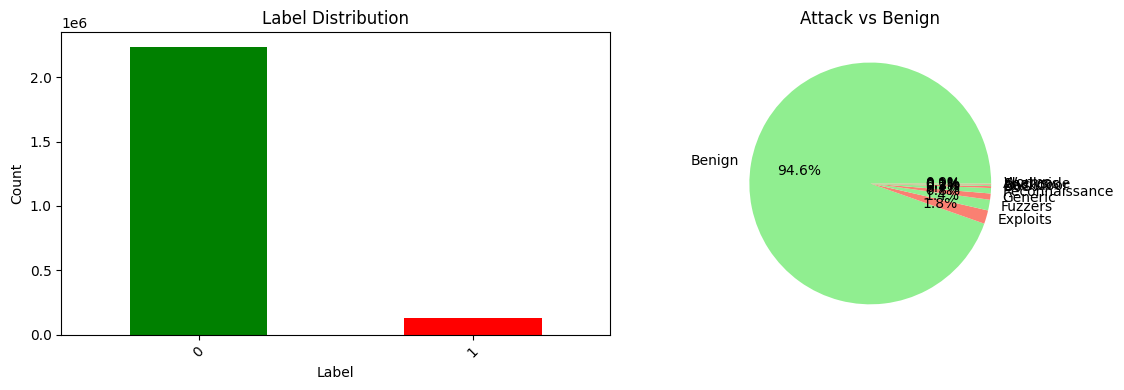

In [16]:
print("Data types:")
print(df.dtypes)

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Label distribution
print(f"\nLabel distribution:")
print(df['Label'].value_counts())
print(f"\nAttack distribution:")
print(df['Attack'].value_counts())

# Visualize label distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Attack'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Attack vs Benign')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [17]:
print("\n" + "="*70)
print("DATA EXPLORATION")
print("="*70)

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Data types
print("\nData types:")
print(df.dtypes)

# Missing values
print("\nMissing values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")

# Label distribution
print(f"\nLabel distribution (Binary):")
print(df['Label'].value_counts())
print(f"\nPercentage:")
print(df['Label'].value_counts(normalize=True) * 100)

# Attack type distribution
print(f"\nAttack type distribution:")
print(df['Attack'].value_counts())


DATA EXPLORATION

First 5 rows:


,FLOW_START_MILLISECONDS,FLOW_END_MILLISECONDS,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,SRC_TO_DST_IAT_MIN,SRC_TO_DST_IAT_MAX,SRC_TO_DST_IAT_AVG,SRC_TO_DST_IAT_STDDEV,DST_TO_SRC_IAT_MIN,DST_TO_SRC_IAT_MAX,DST_TO_SRC_IAT_AVG,DST_TO_SRC_IAT_STDDEV,Label,Attack
0,1424242193040,1424242193043,59.166.0.2,4894,149.171.126.3,53,17,5.0,146,2,178,2,0,0,0,2,0,0,31,31,89,73,73,89,89.000000,73.000000,0,0,0,0,389333,474666,4,0,0,0,0,0,0,0,0,46779,1,60,0,0,0,0,0,0,0,0,0,0,Benign
1,1424242192744,1424242193079,59.166.0.4,52671,149.171.126.6,31992,6,11.0,4704,28,2976,28,27,27,27,335,334,334,31,32,984,52,52,984,8.883582,14.041791,1988,7,1068,6,112000,70857,34,18,2,2,0,14480,14480,50176,196,0,0,0,0,0,91,12,19,0,90,12,19,0,Benign
2,1424242190649,1424242193109,59.166.0.0,47290,149.171.126.9,6881,6,37.0,13662,238,548216,438,27,27,27,2460,2459,2459,31,32,1500,52,52,1500,222.852033,5.553659,1735,21,272908,196,44411,1782091,288,0,4,32,352,65160,34752,50944,199,0,0,0,0,0,1843,10,119,0,1843,5,88,0,Benign
3,1424242193145,1424242193146,59.166.0.8,43310,149.171.126.7,53,17,5.0,146,2,178,2,0,0,0,1,0,0,31,31,89,73,73,89,178.000000,146.000000,0,0,0,0,584000,712000,4,0,0,0,0,0,0,0,0,3211,1,60,0,0,0,0,0,0,0,0,0,0,Benign
4,1424242193239,1424242193241,59.166.0.1,45870,149.171.126.1,53,17,5.0,130,2,162,2,0,0,0,1,0,0,31,31,81,65,65,81,162.000000,130.000000,0,0,0,0,520000,648000,4,0,0,0,0,0,0,0,0,5771,1,60,0,0,0,0,0,0,0,0,0,0,Benign



Data types:
FLOW_START_MILLISECONDS          int64
FLOW_END_MILLISECONDS            int64
IPV4_SRC_ADDR                   object
L4_SRC_PORT                      int64
IPV4_DST_ADDR                   object
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
MAX_TTL                          int64
LONGEST_FLOW_PKT                 int64
SHORTEST_FLOW_PKT                int64
MIN_IP_PKT_LEN                   int64
MAX_IP_PKT_LEN                   int64
SRC_TO_DST_SECOND_BYTES        float64
DST_TO_SRC_S

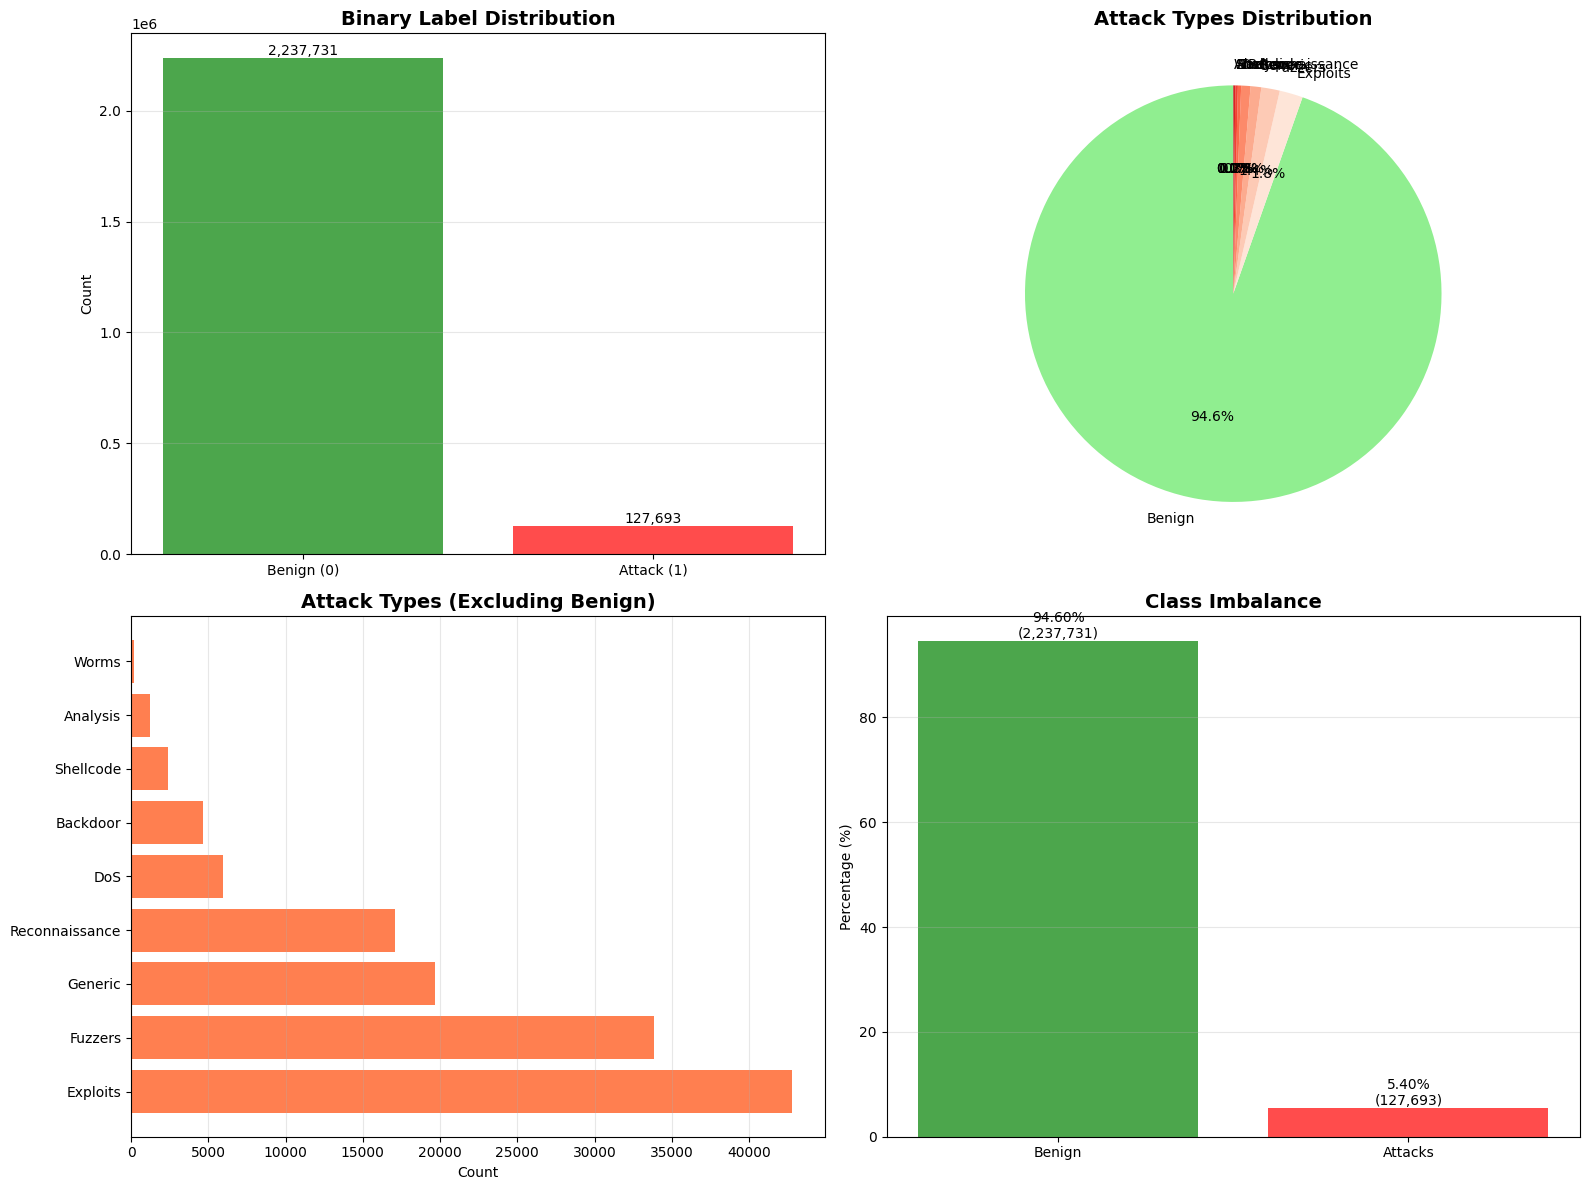

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Label distribution
axes[0, 0].bar(['Benign (0)', 'Attack (1)'], df['Label'].value_counts().sort_index().values, 
               color=['green', 'red'], alpha=0.7)
axes[0, 0].set_title('Binary Label Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(df['Label'].value_counts().sort_index().values):
    axes[0, 0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Attack types pie chart
attack_counts = df['Attack'].value_counts()
colors = ['lightgreen'] + sns.color_palette('Reds', len(attack_counts)-1).as_hex()
axes[0, 1].pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
axes[0, 1].set_title('Attack Types Distribution', fontsize=14, fontweight='bold')

# Top attack types (excluding Benign)
attack_only = df[df['Attack'] != 'Benign']['Attack'].value_counts()
axes[1, 0].barh(range(len(attack_only)), attack_only.values, color='coral')
axes[1, 0].set_yticks(range(len(attack_only)))
axes[1, 0].set_yticklabels(attack_only.index)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Attack Types (Excluding Benign)', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Class imbalance visualization
imbalance_data = pd.DataFrame({
    'Class': ['Benign', 'Attacks'],
    'Count': [df[df['Label']==0].shape[0], df[df['Label']==1].shape[0]],
    'Percentage': [df[df['Label']==0].shape[0]/len(df)*100, 
                   df[df['Label']==1].shape[0]/len(df)*100]
})
axes[1, 1].bar(imbalance_data['Class'], imbalance_data['Percentage'], 
               color=['green', 'red'], alpha=0.7)
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Class Imbalance', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (c, p) in enumerate(zip(imbalance_data['Count'], imbalance_data['Percentage'])):
    axes[1, 1].text(i, p, f'{p:.2f}%\n({c:,})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [19]:
print("\n" + "="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create a copy for processing
df_processed = df.copy()

# Convert IP addresses to numerical features
def ip_to_int(ip):
    """Convert IP address to integer"""
    try:
        parts = ip.split('.')
        return int(parts[0])*16777216 + int(parts[1])*65536 + int(parts[2])*256 + int(parts[3])
    except:
        return 0

print("Converting IP addresses to numerical format...")
df_processed['SRC_IP_INT'] = df_processed['IPV4_SRC_ADDR'].apply(ip_to_int)
df_processed['DST_IP_INT'] = df_processed['IPV4_DST_ADDR'].apply(ip_to_int)

# Extract IP features
df_processed['SRC_IP_CLASS_A'] = df_processed['IPV4_SRC_ADDR'].str.split('.').str[0].astype(int)
df_processed['DST_IP_CLASS_A'] = df_processed['IPV4_DST_ADDR'].str.split('.').str[0].astype(int)

print("✓ IP addresses converted to numerical features")
print(f"New features added: SRC_IP_INT, DST_IP_INT, SRC_IP_CLASS_A, DST_IP_CLASS_A")



FEATURE ENGINEERING
Converting IP addresses to numerical format...
✓ IP addresses converted to numerical features
New features added: SRC_IP_INT, DST_IP_INT, SRC_IP_CLASS_A, DST_IP_CLASS_A


In [20]:
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Drop original IP address columns and separate target
X = df_processed.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Label', 'Attack'], axis=1)
y = df_processed['Label'].values  # 0 = Benign, 1 = Attack
y_attack_type = df_processed['Attack'].values  # For detailed analysis

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures being used: {list(X.columns)}")

# Handle missing values
print(f"\nHandling missing values...")
missing_before = X.isnull().sum().sum()
X = X.fillna(0)  # Fill NaN with 0
print(f"✓ Filled {missing_before} missing values with 0")

# Check for infinite values
inf_count = np.isinf(X.values).sum()
if inf_count > 0:
    print(f"Found {inf_count} infinite values. Replacing with large finite values...")
    X = X.replace([np.inf, -np.inf], [1e10, -1e10])
    print("✓ Infinite values handled")

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]:,}")


DATA PREPROCESSING

Feature matrix shape: (2365424, 55)
Target vector shape: (2365424,)

Features being used: ['FLOW_START_MILLISECONDS', 'FLOW_END_MILLISECONDS', 'L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'SRC_TO_DST_IA

In [21]:
print("\n" + "="*70)
print("FEATURE SCALING")
print("="*70)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✓ Features scaled using StandardScaler")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean of scaled features: {X_scaled.mean():.10f}")
print(f"Std of scaled features: {X_scaled.std():.6f}")

# Check for any remaining issues
print(f"Any NaN after scaling: {np.isnan(X_scaled).any()}")
print(f"Any Inf after scaling: {np.isinf(X_scaled).any()}")



FEATURE SCALING
✓ Features scaled using StandardScaler
Scaled data shape: (2365424, 55)
Mean of scaled features: 0.0000000000
Std of scaled features: 1.000000
Any NaN after scaling: False
Any Inf after scaling: False


In [22]:
print("\n" + "="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

# Split the data (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Also split attack types for detailed analysis
_, y_test_attack_type = train_test_split(
    y_attack_type, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining set distribution:")
print(f"  Benign (0): {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"  Attack (1): {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

print(f"\nTest set distribution:")
print(f"  Benign (0): {(y_test == 0).sum():,} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")
print(f"  Attack (1): {(y_test == 1).sum():,} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")



TRAIN-TEST SPLIT
Training set size: 1,892,339 samples (80.0%)
Test set size: 473,085 samples (20.0%)

Training set distribution:
  Benign (0): 1,790,185 (94.60%)
  Attack (1): 102,154 (5.40%)

Test set distribution:
  Benign (0): 447,546 (94.60%)
  Attack (1): 25,539 (5.40%)


In [23]:
print("\n" + "="*70)
print("TRAINING ISOLATION FOREST MODEL")
print("="*70)

# Calculate contamination (percentage of anomalies)
contamination = (y_train == 1).sum() / len(y_train)
print(f"Calculated contamination: {contamination:.6f} ({contamination*100:.4f}%)")

# Initialize Isolation Forest with optimized parameters
iso_forest = IsolationForest(
    n_estimators=100,              # Number of trees
    max_samples='auto',            # Use min(256, n_samples) automatically
    contamination=contamination,    # Expected proportion of anomalies
    max_features=1.0,              # Use all features
    bootstrap=False,               # Don't use bootstrap sampling
    random_state=42,
    n_jobs=-1,                     # Use all CPU cores
    verbose=1,
    warm_start=False
)

print("\nModel Configuration:")
print(f"  Number of estimators: {iso_forest.n_estimators}")
print(f"  Contamination: {iso_forest.contamination}")
print(f"  Max features: {iso_forest.max_features}")
print(f"  Random state: {iso_forest.random_state}")

# Train the model
print("\nTraining model on {:,} samples...".format(len(X_train)))
print("This may take a few minutes for large datasets...")

import time
start_time = time.time()

iso_forest.fit(X_train)

training_time = time.time() - start_time

print(f"\n✓ Model trained successfully in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")



TRAINING ISOLATION FOREST MODEL
Calculated contamination: 0.053983 (5.3983%)

Model Configuration:
  Number of estimators: 100
  Contamination: 0.05398292800602852
  Max features: 1.0
  Random state: 42

Training model on 1,892,339 samples...
This may take a few minutes for large datasets...


[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 out of  24 | elapsed:    1.9s remaining:   22.0s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s



✓ Model trained successfully in 21.36 seconds (0.36 minutes)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.7s finished


In [24]:
print("\n" + "="*70)
print("MAKING PREDICTIONS")
print("="*70)

# Predict on training set
print("Predicting on training set...")
y_train_pred = iso_forest.predict(X_train)
y_train_pred = np.where(y_train_pred == -1, 1, 0)  # -1 (anomaly) -> 1, 1 (normal) -> 0

# Predict on test set
print("Predicting on test set...")
y_test_pred = iso_forest.predict(X_test)
y_test_pred = np.where(y_test_pred == -1, 1, 0)

# Get anomaly scores (lower score = more anomalous)
print("Computing anomaly scores...")
train_scores = iso_forest.score_samples(X_train)
test_scores = iso_forest.score_samples(X_test)

print("\n✓ Predictions completed!")
print(f"\nTraining set predictions:")
print(f"  Predicted Benign: {(y_train_pred == 0).sum():,}")
print(f"  Predicted Attacks: {(y_train_pred == 1).sum():,}")

print(f"\nTest set predictions:")
print(f"  Predicted Benign: {(y_test_pred == 0).sum():,}")
print(f"  Predicted Attacks: {(y_test_pred == 1).sum():,}")



MAKING PREDICTIONS
Predicting on training set...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.3s finished


Predicting on test set...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


Computing anomaly scores...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s



✓ Predictions completed!

Training set predictions:
  Predicted Benign: 1,790,185
  Predicted Attacks: 102,154

Test set predictions:
  Predicted Benign: 447,469
  Predicted Attacks: 25,616


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [25]:
print("\n" + "="*70)
print("MODEL EVALUATION - TRAINING SET")
print("="*70)

# Training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.6f} ({train_accuracy*100:.4f}%)")

# Classification report
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred, 
                          target_names=['Benign', 'Attack'],
                          digits=4))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training):")
print(f"                 Predicted")
print(f"                 Benign  Attack")
print(f"Actual Benign    {cm_train[0,0]:7,} {cm_train[0,1]:7,}")
print(f"Actual Attack    {cm_train[1,0]:7,} {cm_train[1,1]:7,}")



MODEL EVALUATION - TRAINING SET

Training Accuracy: 0.917190 (91.7190%)

Classification Report (Training):
              precision    recall  f1-score   support

      Benign     0.9562    0.9562    0.9562   1790185
      Attack     0.2330    0.2330    0.2330    102154

    accuracy                         0.9172   1892339
   macro avg     0.5946    0.5946    0.5946   1892339
weighted avg     0.9172    0.9172    0.9172   1892339

Confusion Matrix (Training):
                 Predicted
                 Benign  Attack
Actual Benign    1,711,833  78,352
Actual Attack     78,352  23,802


In [26]:
print("\n" + "="*70)
print("MODEL EVALUATION - TEST SET")
print("="*70)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.6f} ({test_accuracy*100:.4f}%)")

# Classification report
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Benign', 'Attack'],
                          digits=4))

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):")
print(f"                 Predicted")
print(f"                 Benign  Attack")
print(f"Actual Benign    {cm_test[0,0]:7,} {cm_test[0,1]:7,}")
print(f"Actual Attack    {cm_test[1,0]:7,} {cm_test[1,1]:7,}")

# Detailed metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_test_pred, average='binary'
)

print(f"\nDetailed Metrics (Test Set):")
print(f"  Precision: {precision:.6f} ({precision*100:.4f}%)")
print(f"  Recall:    {recall:.6f} ({recall*100:.4f}%)")
print(f"  F1-Score:  {f1:.6f} ({f1*100:.4f}%)")

# False Positive Rate and False Negative Rate
FP = cm_test[0, 1]
FN = cm_test[1, 0]
TN = cm_test[0, 0]
TP = cm_test[1, 1]

FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
FNR = FN / (FN + TP) if (FN + TP) > 0 else 0

print(f"\nError Rates:")
print(f"  False Positive Rate (FPR): {FPR:.6f} ({FPR*100:.4f}%)")
print(f"  False Negative Rate (FNR): {FNR:.6f} ({FNR*100:.4f}%)")



MODEL EVALUATION - TEST SET

Test Accuracy: 0.917543 (91.7543%)

Classification Report (Test):
              precision    recall  f1-score   support

      Benign     0.9565    0.9563    0.9564    447546
      Attack     0.2371    0.2378    0.2374     25539

    accuracy                         0.9175    473085
   macro avg     0.5968    0.5971    0.5969    473085
weighted avg     0.9177    0.9175    0.9176    473085

Confusion Matrix (Test):
                 Predicted
                 Benign  Attack
Actual Benign    428,003  19,543
Actual Attack     19,466   6,073

Detailed Metrics (Test Set):
  Precision: 0.237078 (23.7078%)
  Recall:    0.237793 (23.7793%)
  F1-Score:  0.237435 (23.7435%)

Error Rates:
  False Positive Rate (FPR): 0.043667 (4.3667%)
  False Negative Rate (FNR): 0.762207 (76.2207%)


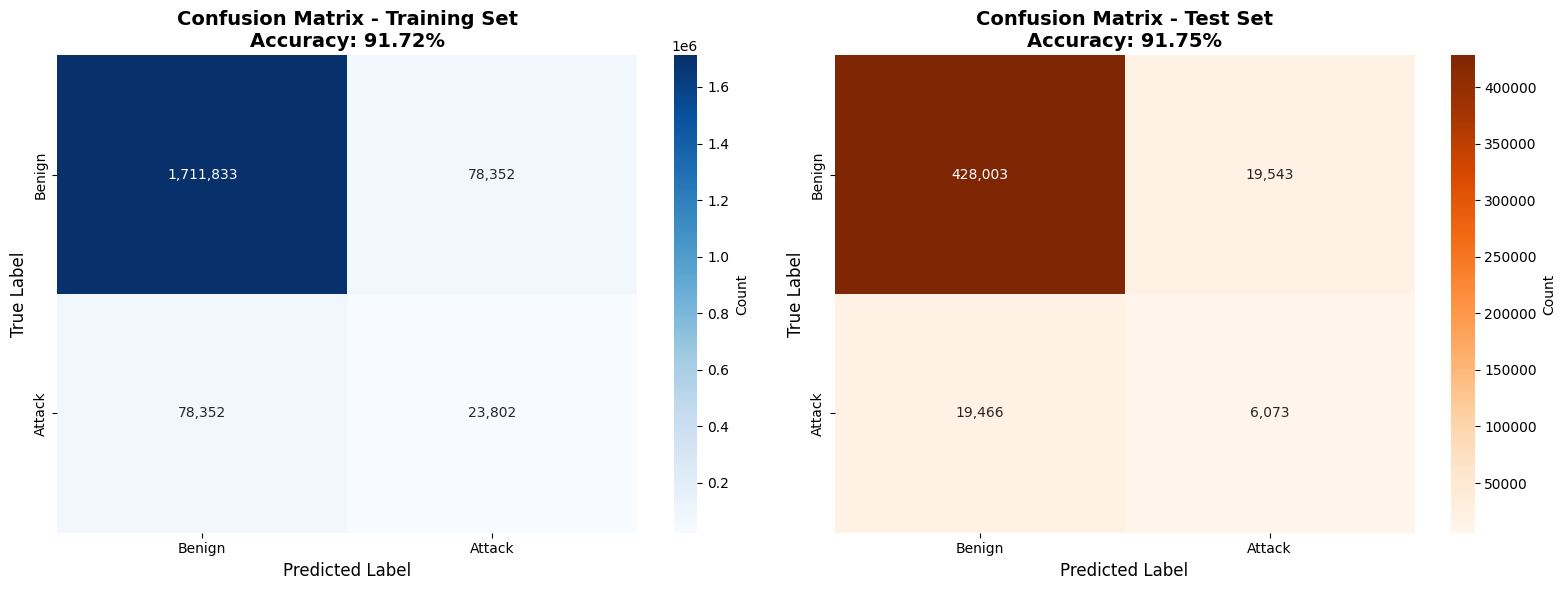

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training confusion matrix
sns.heatmap(cm_train, annot=True, fmt=',d', cmap='Blues', 
            xticklabels=['Benign', 'Attack'],
            yticklabels=['Benign', 'Attack'], 
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title(f'Confusion Matrix - Training Set\nAccuracy: {train_accuracy*100:.2f}%', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt=',d', cmap='Oranges', 
            xticklabels=['Benign', 'Attack'],
            yticklabels=['Benign', 'Attack'], 
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title(f'Confusion Matrix - Test Set\nAccuracy: {test_accuracy*100:.2f}%', 
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

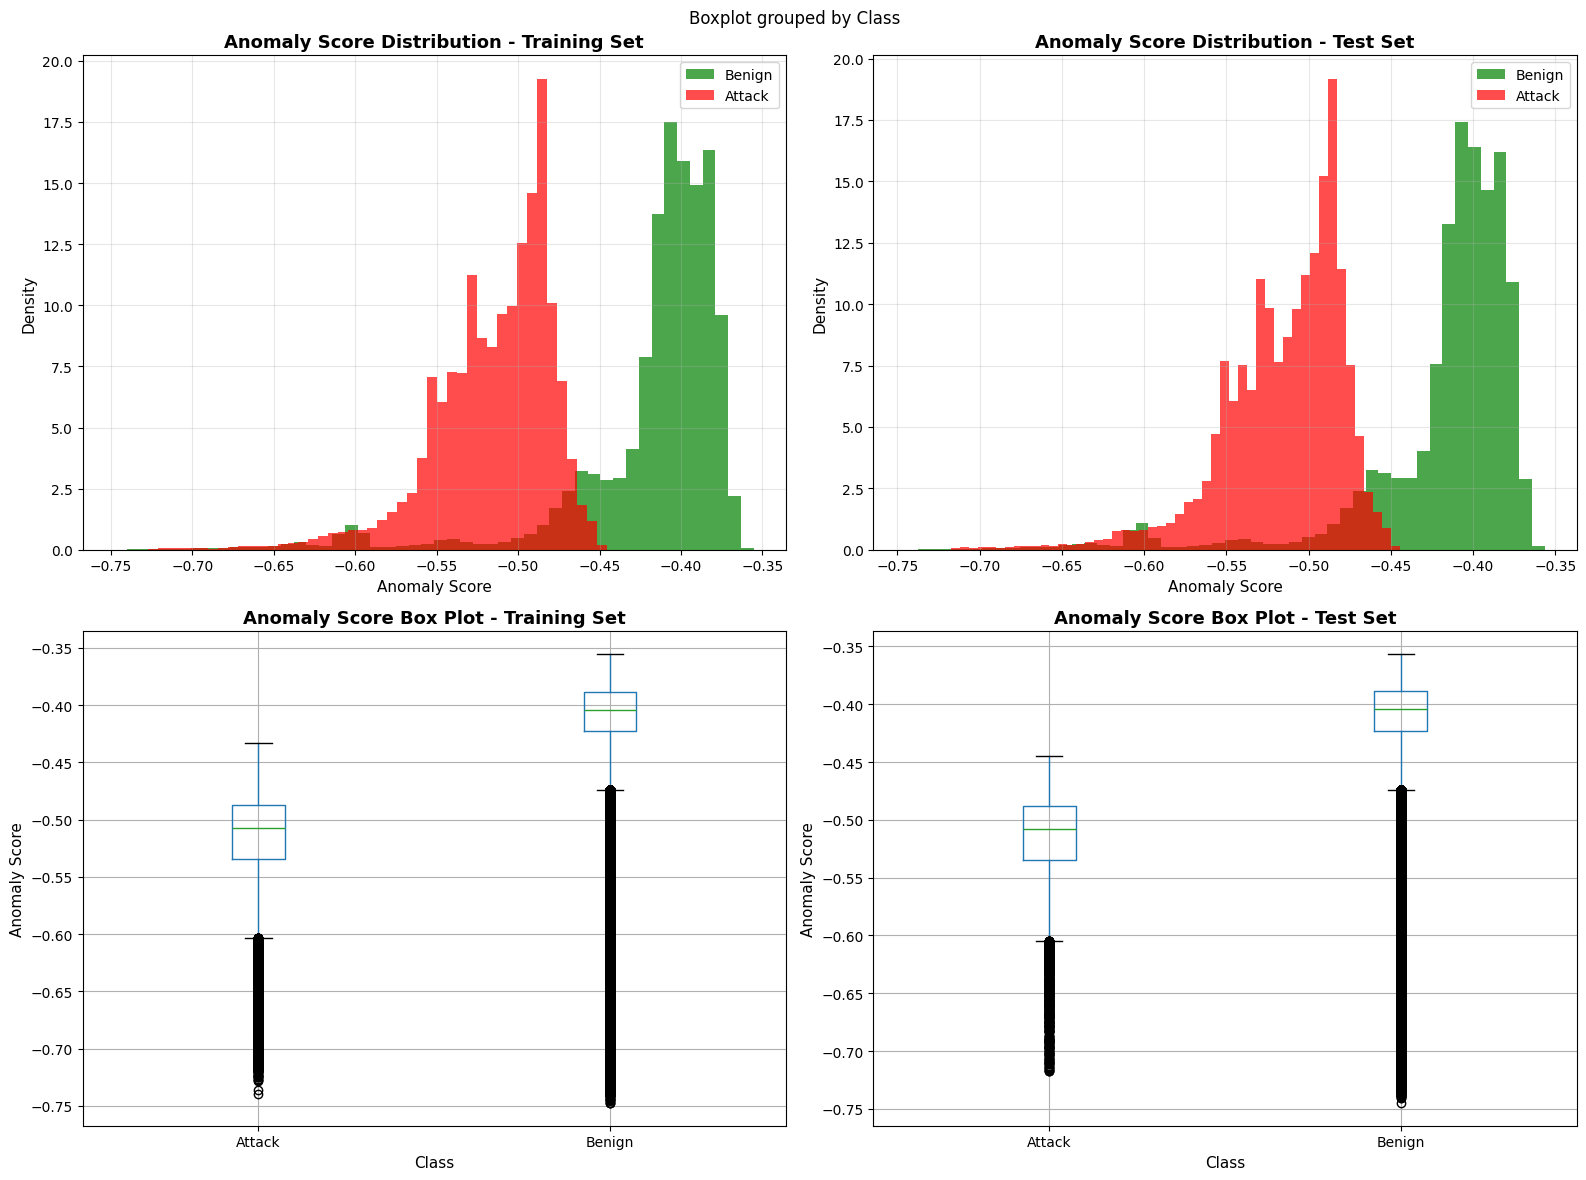


Anomaly Score Statistics:

Training Set:
  Benign samples - Mean: -0.4174, Std: 0.0501
  Attack samples - Mean: -0.5150, Std: 0.0365

Test Set:
  Benign samples - Mean: -0.4174, Std: 0.0500
  Attack samples - Mean: -0.5153, Std: 0.0368


In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Training scores distribution
axes[0, 0].hist(train_scores[y_train == 0], bins=50, alpha=0.7, 
                label='Benign', color='green', density=True)
axes[0, 0].hist(train_scores[y_train == 1], bins=50, alpha=0.7, 
                label='Attack', color='red', density=True)
axes[0, 0].set_xlabel('Anomaly Score', fontsize=11)
axes[0, 0].set_ylabel('Density', fontsize=11)
axes[0, 0].set_title('Anomaly Score Distribution - Training Set', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Test scores distribution
axes[0, 1].hist(test_scores[y_test == 0], bins=50, alpha=0.7, 
                label='Benign', color='green', density=True)
axes[0, 1].hist(test_scores[y_test == 1], bins=50, alpha=0.7, 
                label='Attack', color='red', density=True)
axes[0, 1].set_xlabel('Anomaly Score', fontsize=11)
axes[0, 1].set_ylabel('Density', fontsize=11)
axes[0, 1].set_title('Anomaly Score Distribution - Test Set', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot - Training
train_score_data = pd.DataFrame({
    'Score': train_scores,
    'Class': ['Benign' if y == 0 else 'Attack' for y in y_train]
})
train_score_data.boxplot(column='Score', by='Class', ax=axes[1, 0])
axes[1, 0].set_title('Anomaly Score Box Plot - Training Set', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Class', fontsize=11)
axes[1, 0].set_ylabel('Anomaly Score', fontsize=11)
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Attack', 'Benign'])

# Box plot - Test
test_score_data = pd.DataFrame({
    'Score': test_scores,
    'Class': ['Benign' if y == 0 else 'Attack' for y in y_test]
})
test_score_data.boxplot(column='Score', by='Class', ax=axes[1, 1])
axes[1, 1].set_title('Anomaly Score Box Plot - Test Set', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Class', fontsize=11)
axes[1, 1].set_ylabel('Anomaly Score', fontsize=11)
plt.sca(axes[1, 1])
plt.xticks([1, 2], ['Attack', 'Benign'])

plt.tight_layout()
plt.show()

# Print score statistics
print("\nAnomaly Score Statistics:")
print("\nTraining Set:")
print(f"  Benign samples - Mean: {train_scores[y_train==0].mean():.4f}, Std: {train_scores[y_train==0].std():.4f}")
print(f"  Attack samples - Mean: {train_scores[y_train==1].mean():.4f}, Std: {train_scores[y_train==1].std():.4f}")
print("\nTest Set:")
print(f"  Benign samples - Mean: {test_scores[y_test==0].mean():.4f}, Std: {test_scores[y_test==0].std():.4f}")
print(f"  Attack samples - Mean: {test_scores[y_test==1].mean():.4f}, Std: {test_scores[y_test==1].std():.4f}")
